# Tic-Tac-Toe MCTS Performance Evaluation

In this notebook, we explore the performance of different tree policies within the Monte Carlo Tree Search (MCTS) framework applied to a Tic-Tac-Toe game. We will compare the Probability of Correct Selection (PCS) between the standard UCB (Upper Confidence Bound) and the OCBA (Optimal Computing Budget Allocation) tree policies following the implementation from the paper [OCBA-MCTS Paper](https://arxiv.org/pdf/2009.12407).

The experiment will involve simulating a series of games where the MCTS algorithm selects the best move from a given starting position. The PCS will be evaluated based on the selection of the center move (considered optimal in this context) across different numbers of simulations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Importing Required Libraries

We start by importing the necessary libraries and modules. These include classes for Tic-Tac-Toe game states and moves, MCTS, and the specific tree policies we are comparing.

In [2]:
from tictactoe import TicTacToeMove, TicTacToeGameState
from node import StateNode, StateActionNode
from mcts import MonteCarloTreeSearch
from tree_policy import TreePolicy_UCB, TreePolicy_OCBA

## Setting Up the Experiment

We define the range of simulations `Ns` we will use and set the number of repetitions to ensure statistically significant results. The Tic-Tac-Toe board is initialized with a specific starting move to create the initial game state, which will serve as the root of the MCTS tree.

In [3]:
Ns = np.linspace(300, 700, num=9, dtype=int, endpoint=True)
n_repetitions = 1000

In [4]:
initial_player = 1
board_size = 3
board = np.zeros((board_size,board_size))
init_env_state = TicTacToeGameState(board, initial_player)
tictactoe_move = TicTacToeMove(0, 0, initial_player)
init_env_state = init_env_state.move(tictactoe_move)

## Visualizing the Tic-Tac-Toe Board

Before we start the MCTS simulations, we display the board's position layout and the initial configuration after the first move. This helps in understanding the starting point for the MCTS algorithm.

In [5]:
print("The number corresponding to each position of the board is illustrated in the sequence:")
init_env_state.print_board_positions()

The number corresponding to each position of the board is illustrated in the sequence:

0 | 1 | 2
--+---+--
3 | 4 | 5
--+---+--
6 | 7 | 8



In [6]:
print("Root node board configuration:")
init_env_state.print_board()

Root node board configuration:

O |   |  
--+---+--
  |   |  
--+---+--
  |   |  




## Running MCTS Simulations with Different Tree Policies

We now run the MCTS algorithm using both the UCB and OCBA tree policies. For each policy, the algorithm will simulate a series of games, and we will record how often the center move is selected as the best action. This selection frequency is used to calculate the Probability of Correct Selection (PCS).

In [7]:
tree_policy_ucb = TreePolicy_UCB()
tree_policy_ocba = TreePolicy_OCBA()

tree_policies = [tree_policy_ucb, tree_policy_ocba]

In [8]:
for tree_policy in tree_policies:
    pcs = np.zeros(len(Ns))
    
    for seed in tqdm(range(n_repetitions)):
    #for seed in range(n_repetitions):
        np.random.seed(seed)
        for it in range(len(Ns)):
            root = StateNode(init_env_state)
            mcts = MonteCarloTreeSearch(root, tree_policy)
            df = mcts.search(Ns[it])
        
            best_action = mcts.best_action()
            best_action_id = best_action.move_id
            
            if best_action_id == 4:
                pcs[it] += 1
            
    pcs /= n_repetitions
    tree_policy.set_pcs(pcs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:27:57<00:00,  5.28s/it]


## Plotting PCS Curve Comparison

Finally, we plot the PCS curve for each tree policy across the different numbers of simulations `N`. This will allow us to visually compare the performance of UCB and OCBA in guiding the MCTS algorithm toward selecting the optimal move.

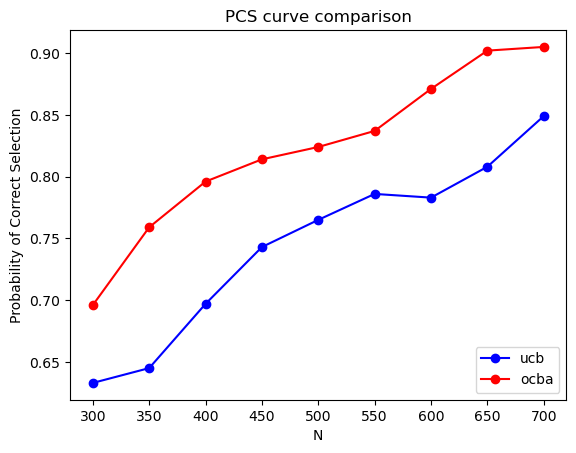

In [9]:
plt.figure()

# PCS arrays
for tree_policy in tree_policies:
    plt.plot(Ns, tree_policy.pcs, 'o-', label=tree_policy.name, color=tree_policy.color)

# Plot
plt.title('PCS curve comparison')
plt.xlabel('N')
plt.ylabel('Probability of Correct Selection')
plt.legend(loc="lower right")
plt.show()

## Conclusion

This experiment highlights the efficiency of the OCBA tree policy in guiding the MCTS algorithm compared to the traditional UCB method. The OCBA-MCTS combination demonstrates a higher Probability of Correct Selection with fewer simulations, making it a promising approach for resource-constrained decision-making problems.